In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# df = pd.read_csv('../01_data/01-3_processed/lendingclub_features_for_linear.csv')
# df = pd.read_csv('../01_data/01-3_processed/lendingclub_features_for_RF_XG.csv')
df = pd.read_csv('../data/processed/lendingclub_features_for_lightgbm.csv')


/var/folders/_h/70z4qq3n5p3_x1hqtbcqs_hw0000gn/T/ipykernel_20380/3973482856.py:3: DtypeWarning: Columns (0,46,56,124,125,126,129,130,131,134) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/processed/lendingclub_features_for_lightgbm.csv')


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925493 entries, 0 to 2925492
Columns: 145 entries, id to sec_app_earliest_cr_line_num
dtypes: float64(29), int64(2), object(114)
memory usage: 3.2+ GB
None


In [6]:
print(df['loan_status'].value_counts(normalize = True))

loan_status
Fully Paid                                             0.511976
Current                                                0.352425
Charged Off                                            0.123927
Late (31-120 days)                                     0.005522
In Grace Period                                        0.003428
Late (16-30 days)                                      0.000929
Issued                                                 0.000705
Does not meet the credit policy. Status:Fully Paid     0.000680
Does not meet the credit policy. Status:Charged Off    0.000260
Default                                                0.000148
Name: proportion, dtype: float64


In [7]:
print(df.describe())

          loan_amnt   funded_amnt  funded_amnt_inv          term  \
count  2.925492e+06  2.925492e+06     2.925492e+06  2.925492e+06   
mean   1.535878e+04  1.535470e+04     1.534005e+04  4.309965e+01   
std    9.478383e+03  9.477145e+03     9.480634e+03  1.095384e+01   
min    5.000000e+02  5.000000e+02     0.000000e+00  3.600000e+01   
25%    8.000000e+03  8.000000e+03     8.000000e+03  3.600000e+01   
50%    1.300000e+04  1.300000e+04     1.300000e+04  3.600000e+01   
75%    2.000000e+04  2.000000e+04     2.000000e+04  6.000000e+01   
max    4.000000e+04  4.000000e+04     4.000000e+04  6.000000e+01   

           int_rate   installment     emp_title   title     out_prncp  \
count  2.925492e+06  2.925492e+06  1.610000e+02   131.0  2.925492e+06   
mean   1.304545e+01  4.523914e+02  3.505606e+06     inf  4.038697e+03   
std    4.860815e+00  2.729478e+02  4.364236e+07     NaN  7.485058e+03   
min    5.310000e+00  4.930000e+00  1.000000e+00     0.0  0.000000e+00   
25%    9.170000e+00  2

In [5]:
nan_ratio = df['installment'].isna().mean()
print(f'installment nan ratio: {nan_ratio:.4%}({nan_ratio:.4f})')

installment nan ratio: 0.0000%(0.0000)


/var/folders/_h/70z4qq3n5p3_x1hqtbcqs_hw0000gn/T/ipykernel_20380/536331273.py:2: DtypeWarning: Columns (0,46,56,124,125,126,129,130,131,134) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/processed/lendingclub_features_for_lightgbm.csv')


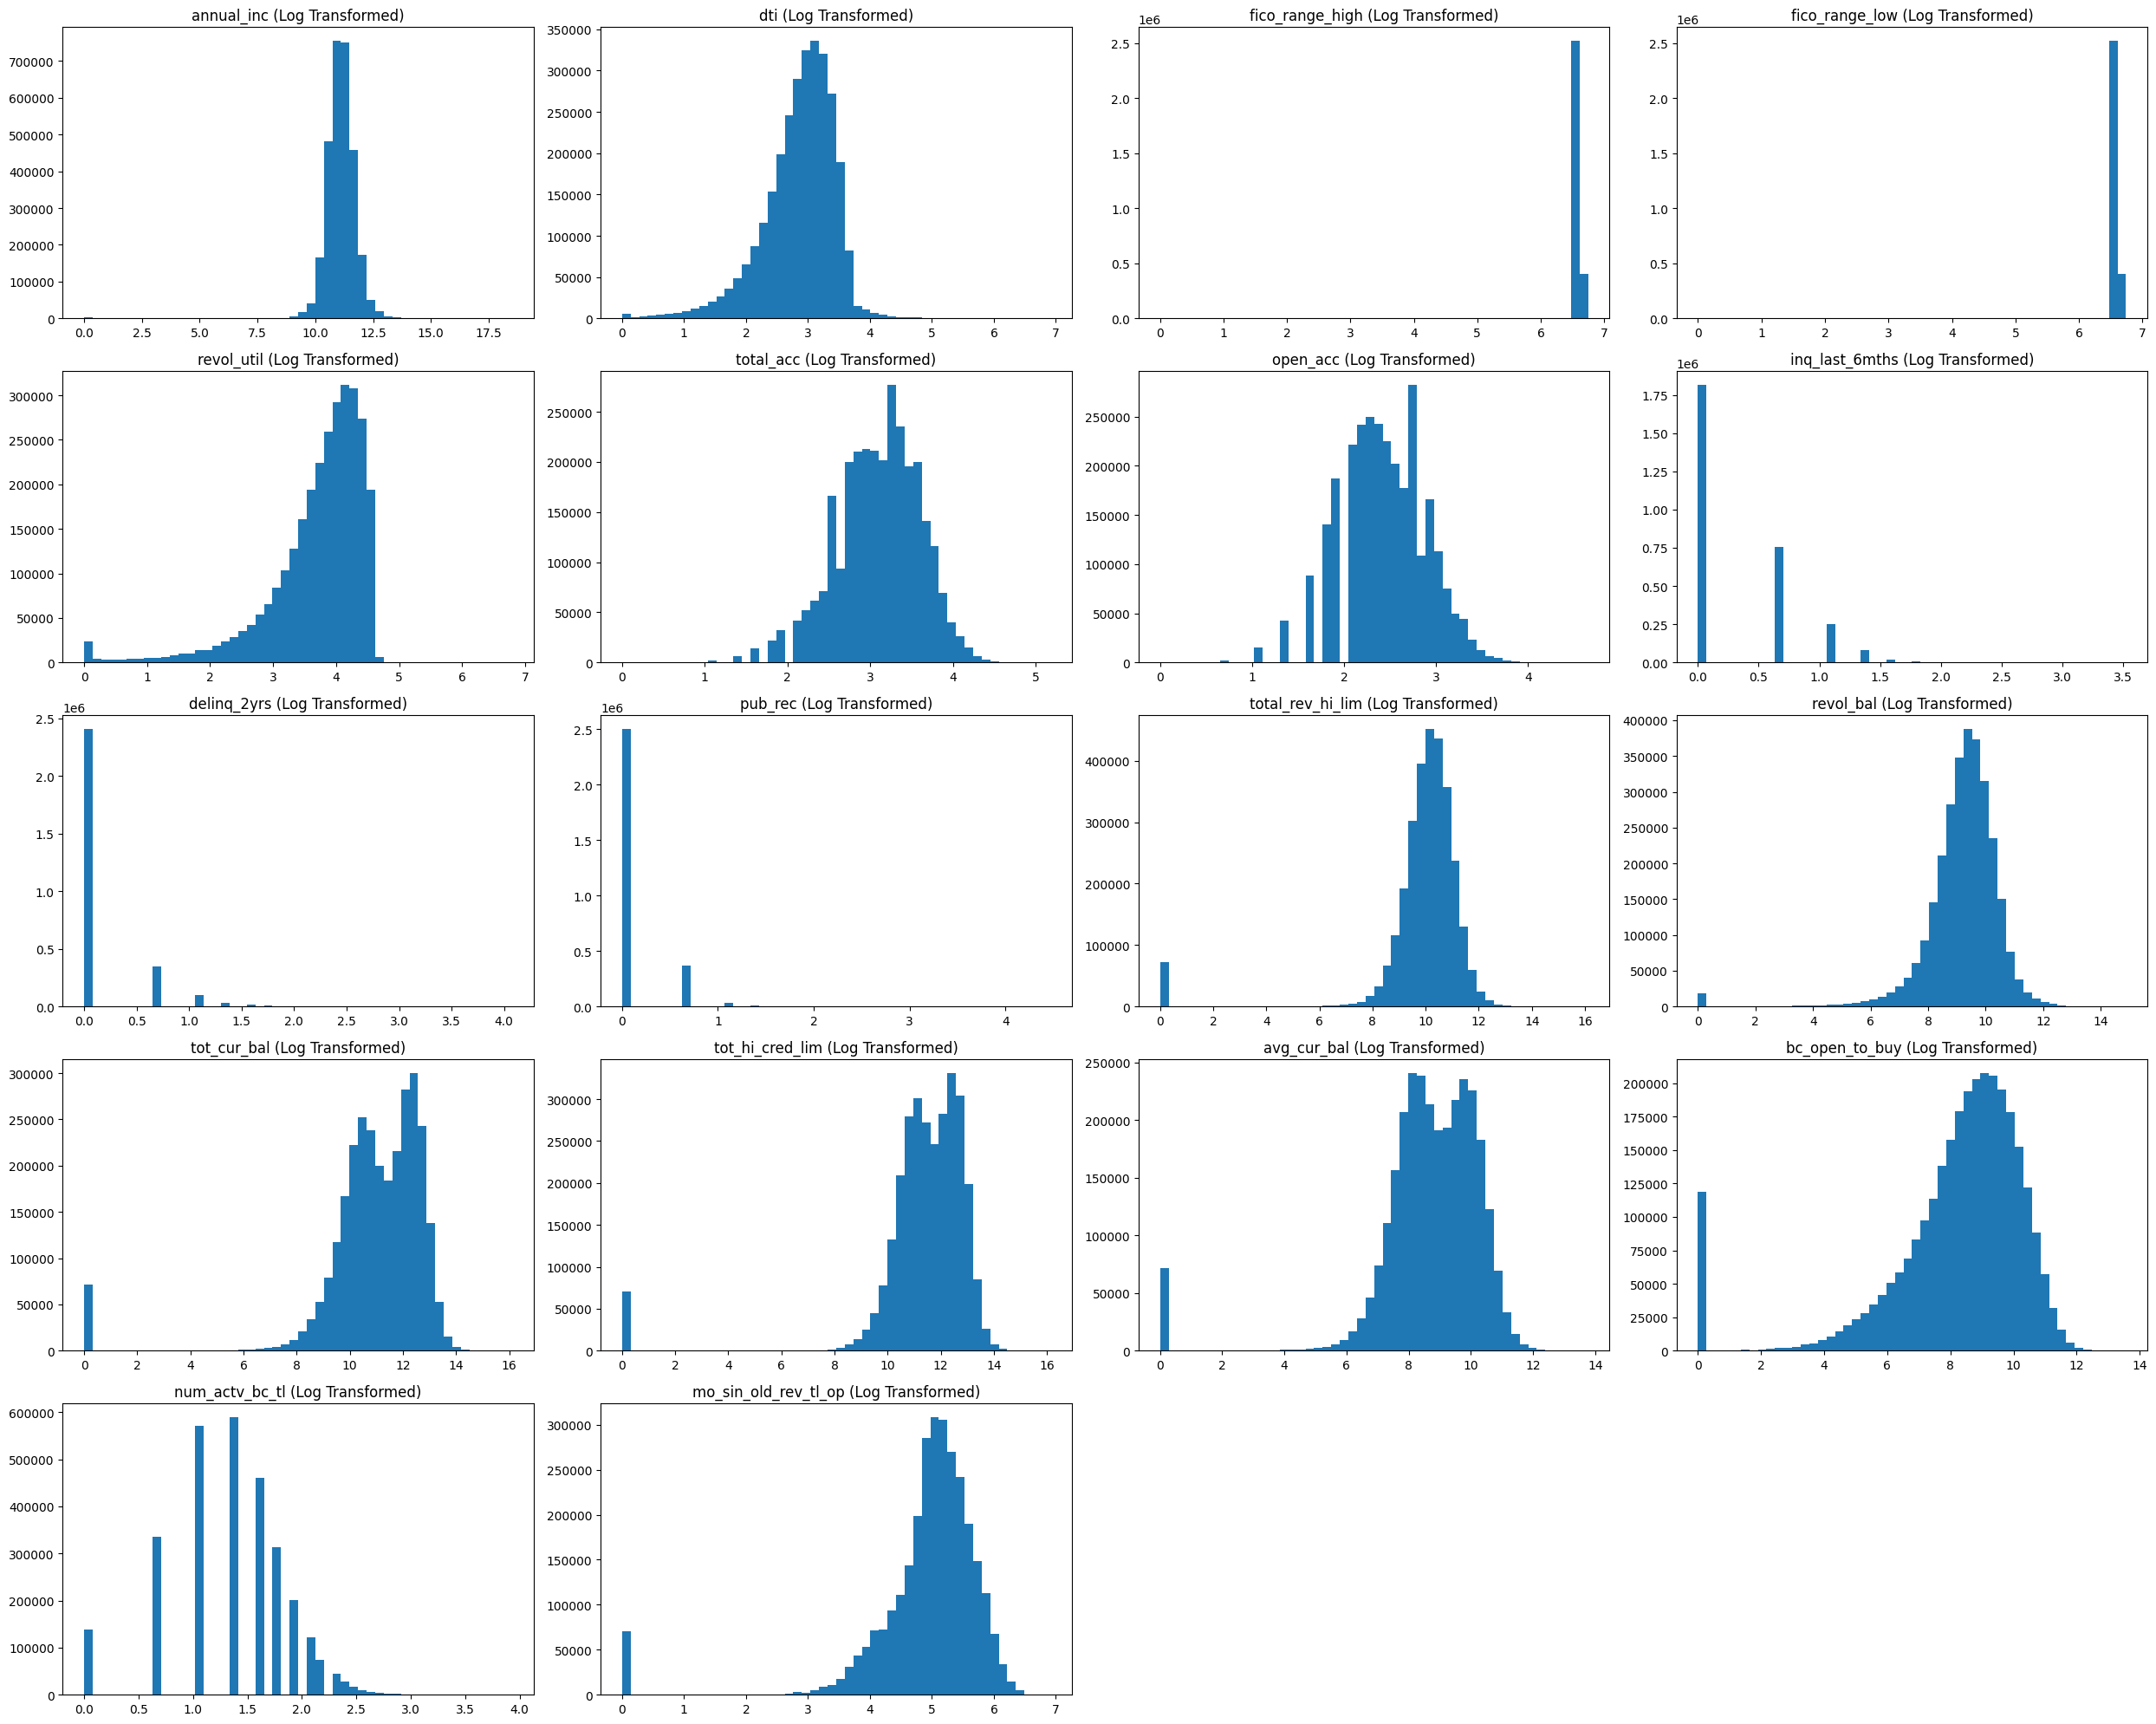

In [10]:
# 데이터 불러오기
df = pd.read_csv('../data/processed/lendingclub_features_for_lightgbm.csv')

important_features = [
    'annual_inc', 'dti', 'fico_range_high', 'fico_range_low', 'revol_util',
    'total_acc', 'open_acc', 'inq_last_6mths', 'delinq_2yrs', 'pub_rec',
    'total_rev_hi_lim', 'revol_bal', 'tot_cur_bal', 'tot_hi_cred_lim',
    'avg_cur_bal', 'bc_open_to_buy', 'num_actv_bc_tl', 'mo_sin_old_rev_tl_op'
]

# 설정
cut_percentile = 0.99   # 이상치 cut 기준
unique_thresh = 10      # 이산형 구분할 unique 수 기준
var_thresh = 0.001      # 분산이 너무 낮으면 이산형으로 간주

# 플롯
plt.figure(figsize=(25, 20))

for idx, col in enumerate(important_features):
    plt.subplot(5, 4, idx+1)
    
    series = df[col].dropna()

    # 📍 타입 분류 기준
    if (series.nunique() <= unique_thresh) or (series.var() < var_thresh):
        var_type = 'discrete'
    else:
        var_type = 'continuous'

    # 📍 변환
    if var_type == 'continuous':
        safe_col = series[series >= 0]  # 0 이상만
        plt.hist(np.log1p(safe_col), bins=50)
        plt.title(f'{col} (Log Transformed)')

    elif var_type == 'discrete':
        threshold = series.quantile(cut_percentile)
        filtered = series[series <= threshold]
        plt.hist(filtered, bins=50)
        plt.title(f'{col} (Discrete or Cut)')

plt.tight_layout()
plt.show()